In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()
print(diabetes)


{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]], shape=(442, 10)), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [2]:
my_df =pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
my_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [3]:
my_df['target']=diabetes.target

In [4]:
my_df.head()
X=my_df.drop('target',axis=1)
y=my_df['target']
X.shape ,y.shape


((442, 10), (442,))

In [5]:
from sklearn.model_selection import train_test_split
#to split data into training and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)    #20% for testing size and 80 for training
print("the shape of training set :",X_train.shape,y_train.shape) #80%of 442 =353
print("the shape of testing :",X_test.shape,y_test.shape) # 20% of 442=89

the shape of training set : (353, 10) (353,)
the shape of testing : (89, 10) (89,)


In [6]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()   #created a linear regression model

In [7]:
lr.fit(X_train,y_train) #fitted training data into the model

LinearRegression()

In [8]:
y_pred=lr.predict(X_test)
# y_pred are predicted values of target variables based on their features
# once we have those predictions ,we compare them with the actual
# values to see how the model performs

In [9]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

#to evaluate performance of models
r2 =r2_score(y_test,y_pred) #it is the variance of dependent variables(target) explained by independent variables(features)
                            #it tells how well the model performs.Higher the better(range 0-1)

#MSE: average squared distance between the predicted value and the actual value.(Lower is better)
mse=mean_squared_error(y_test,y_pred)

#MAE: average absolute distance between predicted value and actual value(lower is better)
mae=mean_absolute_error(y_test,y_pred)

#intercept is starting point of regression line on y-axis
#value of target when function is 0
#if +ve number then target increases as features increases,if -ve its opposite
intercept=lr.intercept_

print("R2 score: ", r2)
print("Mean squared error: ",mse)
print("Mean absolute error: ",mae)
print("Intercept: ",intercept)

R2 score:  0.4526027629719195
Mean squared error:  2900.1936284934814
Mean absolute error:  42.79409467959994
Intercept:  151.34560453985995


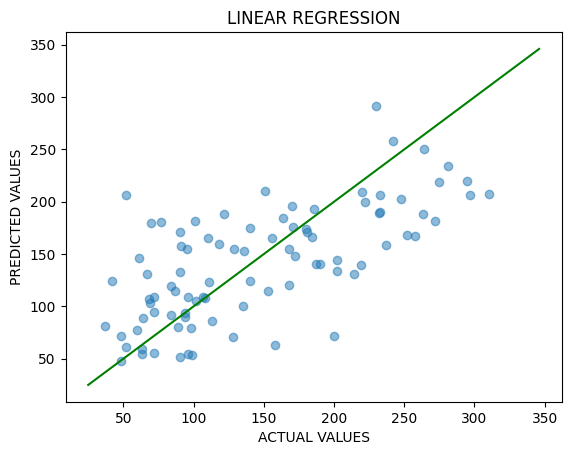

In [10]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,alpha=0.5)
plt.plot([y.min(),y.max()],[y.min(),y.max()],color="green")
plt.xlabel("ACTUAL VALUES")
plt.ylabel("PREDICTED VALUES")
plt.title("LINEAR REGRESSION")
plt.show()